              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.25      1.00      0.40         1

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



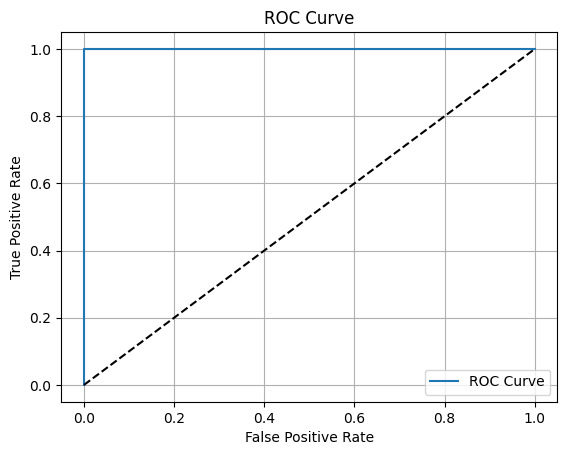

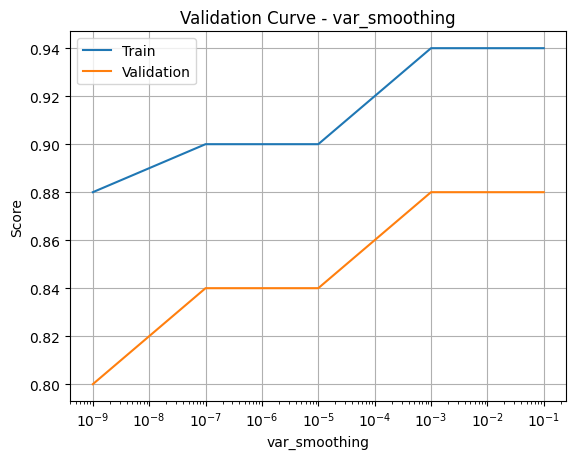

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_curve, auc

df = pd.read_csv("covid(For Naive Bayes Program).csv").drop("no", axis=1)
df = df.apply(lambda x: pd.factorize(x)[0])

X, y = df.drop("diagnosis", axis=1), df["diagnosis"]
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB().fit(Xtr, ytr)
print(classification_report(yte, model.predict(Xte)))

if len(np.unique(y)) == 2:
    probs = model.predict_proba(Xte)[:, 1]
    fpr, tpr, _ = roc_curve(yte, probs)
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("ROC curve skipped: target is not binary.")

p = np.logspace(-9, -1, 5)
train_scores, val_scores = validation_curve(GaussianNB(), X, y, param_name="var_smoothing", param_range=p, cv=5)
plt.semilogx(p, train_scores.mean(1), label="Train")
plt.semilogx(p, val_scores.mean(1), label="Validation")
plt.title("Validation Curve - var_smoothing")
plt.xlabel("var_smoothing")
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()
